In [1]:
import os
import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('../..')

In [3]:
SEEDS = [27, 28, 29]
MODELS = ['dbert', 'dbidaf', 'droberta', 'squad']
BATCH_SIZE = 32

## Load data

### Load per example metrics

In [4]:
example_metric_df = pd.DataFrame()

for seed in SEEDS:
    for model in MODELS:
        df = pd.read_csv(f'data/processed/per_example_metrics-squadv1-adversarialall-dataset={model}-seed={seed}.csv')
        print(df.shape)
        example_metric_df = example_metric_df.append(df)
        
print(example_metric_df.shape)
example_metric_df.head()

(120000, 6)
(120000, 6)
(120000, 6)
(1268400, 6)
(120000, 6)
(120000, 6)
(120000, 6)
(1268400, 6)
(120000, 6)
(120000, 6)
(120000, 6)
(1268400, 6)
(4885200, 6)


,id,checkpoint,seed,exact_match,f1,dataset
0,21a3561031f2e909338196601f5c1ac2e08905b6,2956,27,100.0,100.000000,dbert
1,21a3561031f2e909338196601f5c1ac2e08905b6,684,27,0.0,36.363636,dbert
2,21a3561031f2e909338196601f5c1ac2e08905b6,44,27,0.0,0.000000,dbert
3,21a3561031f2e909338196601f5c1ac2e08905b6,10,27,100.0,100.000000,dbert
4,21a3561031f2e909338196601f5c1ac2e08905b6,876,27,0.0,44.444444,dbert


### Duplicate and add seed and km_seed columns

In [5]:
example_metric_df_expanded = pd.DataFrame()

for k_seed in SEEDS:
    for n_clusters in [4, 7, 10]:
        df = example_metric_df.copy()
        df['km_seed'] = k_seed
        df['n_clusters'] = n_clusters
        example_metric_df_expanded = example_metric_df_expanded.append(df)

In [6]:
example_metric_df_expanded.shape

(43966800, 8)

### Load cluster labels

In [7]:
cluster_data = pd.DataFrame()

for seed in SEEDS:
    for km_seed in SEEDS:
        for n_clusters in [4, 7, 10]:
            df = pd.read_csv(f'data/processed/squadv1-adversarialall-clusters-seed={seed}-km_seed={km_seed}-n_clusters={n_clusters}.csv')
            df['n_clusters'] = n_clusters
            cluster_data = cluster_data.append(df)

In [8]:
cluster_data.shape

(366390, 5)

### Merge data

In [9]:
example_metric_df_expanded.head()

,id,checkpoint,seed,exact_match,f1,dataset,km_seed,n_clusters
0,21a3561031f2e909338196601f5c1ac2e08905b6,2956,27,100.0,100.000000,dbert,27,4
1,21a3561031f2e909338196601f5c1ac2e08905b6,684,27,0.0,36.363636,dbert,27,4
2,21a3561031f2e909338196601f5c1ac2e08905b6,44,27,0.0,0.000000,dbert,27,4
3,21a3561031f2e909338196601f5c1ac2e08905b6,10,27,100.0,100.000000,dbert,27,4
4,21a3561031f2e909338196601f5c1ac2e08905b6,876,27,0.0,44.444444,dbert,27,4


In [10]:
cluster_data.head()

,id,KM_label,km_seed,model_seed,n_clusters
0,000bcf40cda48527886c945b612c0c54ed46dff8,2,27,27,4
1,001a30863d32440f80d5f4f65e7bb3ee0698f0a0,3,27,27,4
2,00245d3e103a58ff1e76c4996721a03a70412422,1,27,27,4
3,004241bb0375392cd909e85aeedbdf9b2f899def,1,27,27,4
4,0054d06bf3be61edaa33f71cf897f98a37e73ea8,3,27,27,4


In [11]:
combined = example_metric_df_expanded.merge(
    cluster_data, 
    left_on=['id', 'seed', 'km_seed', 'n_clusters'], 
    right_on=['id', 'model_seed', 'km_seed', 'n_clusters']
)
print(combined.shape)
combined.head()

(43966800, 10)


,id,checkpoint,seed,exact_match,f1,dataset,km_seed,n_clusters,KM_label,model_seed
0,21a3561031f2e909338196601f5c1ac2e08905b6,2956,27,100.0,100.000000,dbert,27,4,3,27
1,21a3561031f2e909338196601f5c1ac2e08905b6,684,27,0.0,36.363636,dbert,27,4,3,27
2,21a3561031f2e909338196601f5c1ac2e08905b6,44,27,0.0,0.000000,dbert,27,4,3,27
3,21a3561031f2e909338196601f5c1ac2e08905b6,10,27,100.0,100.000000,dbert,27,4,3,27
4,21a3561031f2e909338196601f5c1ac2e08905b6,876,27,0.0,44.444444,dbert,27,4,3,27


In [12]:
assert combined.shape[0] == (
    13570 *  # Number of examples
    120 *  # Number of checkpoints
    3 *  # Number of seeds
    3 * # Number of k-means seeds
    3  # Number of clusters tried
)

In [13]:
combined['num_examples'] = combined['checkpoint'] * BATCH_SIZE

## Plot data

Full trajectory

27 27 0 0
27 28 0 1
27 29 0 2
28 27 1 0
28 28 1 1
28 29 1 2
29 27 2 0
29 28 2 1
29 29 2 2


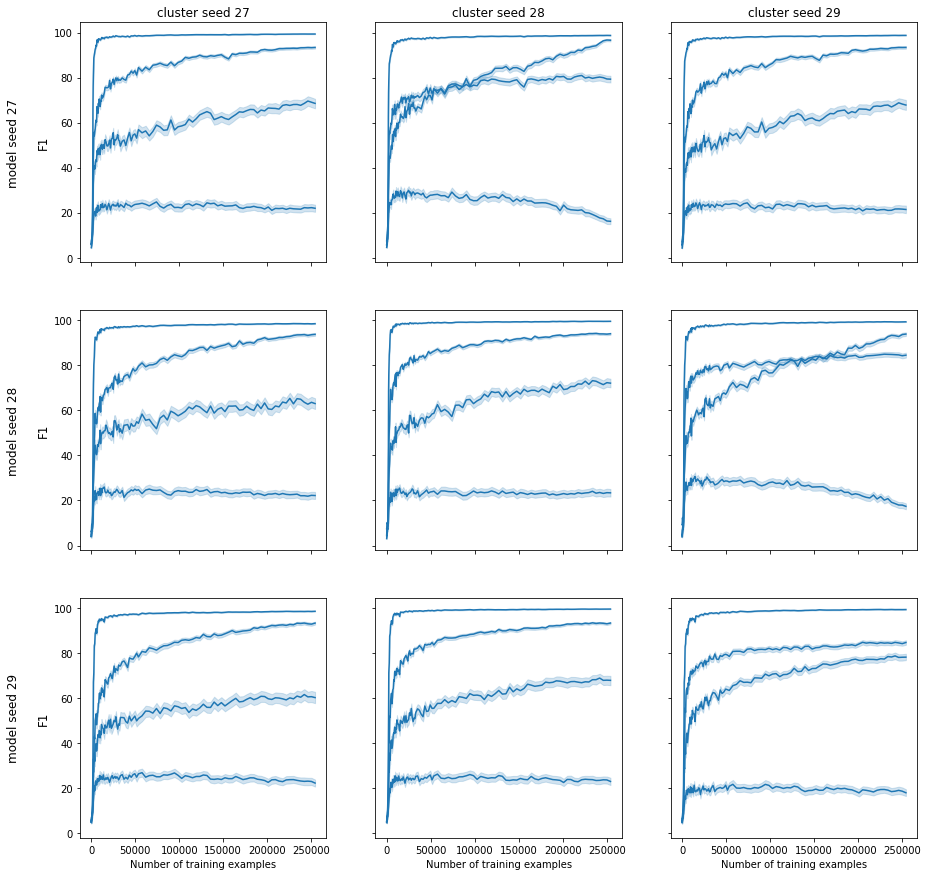

27 27 0 0
27 28 0 1
27 29 0 2
28 27 1 0
28 28 1 1
28 29 1 2
29 27 2 0
29 28 2 1
29 29 2 2


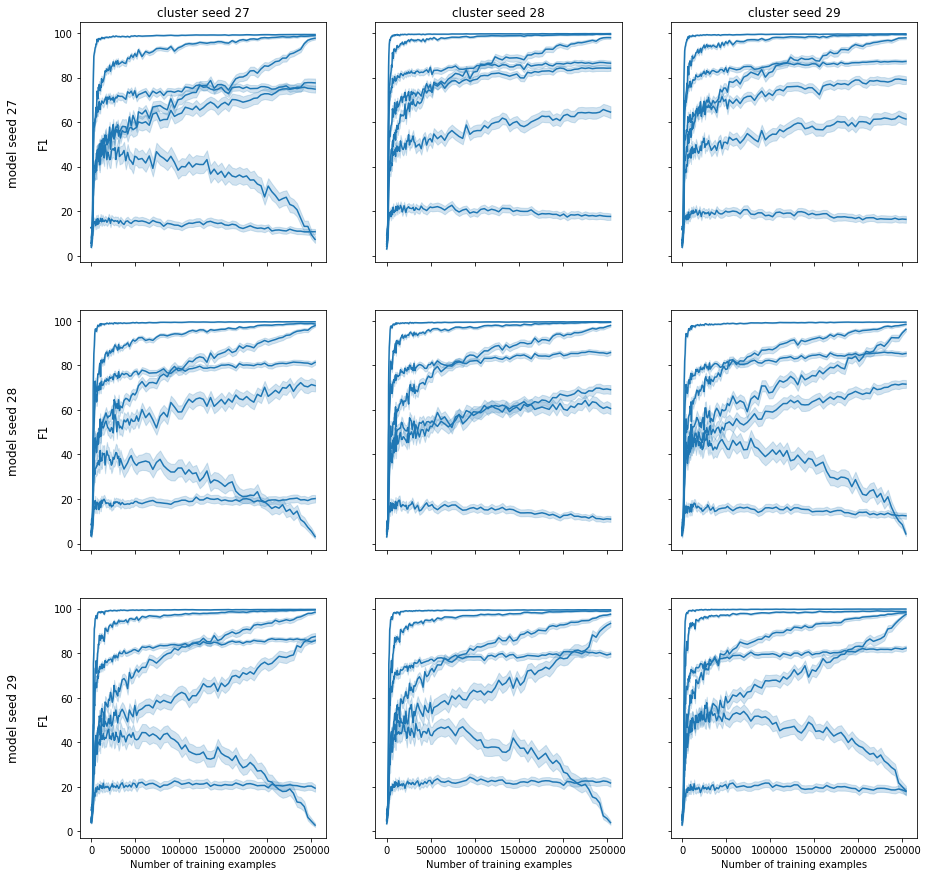

27 27 0 0
27 28 0 1
27 29 0 2
28 27 1 0
28 28 1 1
28 29 1 2
29 27 2 0
29 28 2 1
29 29 2 2


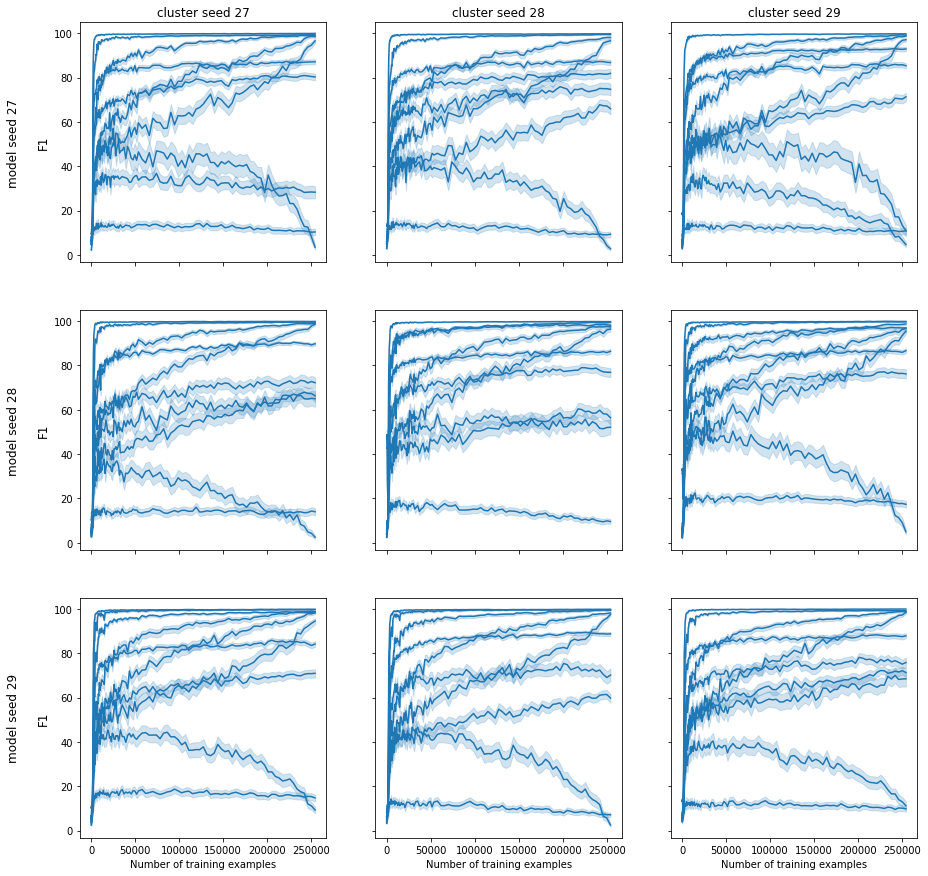

In [14]:
for n_clusters in [4, 7, 10]:

    plot_df = combined[combined['n_clusters'] == n_clusters]

    fig, axs = plt.subplots(len(SEEDS), len(SEEDS), figsize=(15, 15), sharex=True, sharey=True)

    idx_x, idx_y = 0, 0  
    i = 0
    for seed in SEEDS:
        for km_seed in SEEDS:

            print(seed, km_seed, idx_x, idx_y)
            
            plot_df_mean = plot_df[
                (plot_df['model_seed'] == seed) & 
                (plot_df['km_seed'] == km_seed)
            ]  # .groupby(
#                 ['num_examples', 'KM_label']  # Take average over examples belonging to a cluster for a given checkpoint
#             ).mean().reset_index()
            
#             assert plot_df_mean.shape[0] == 120 * n_clusters
            
            palette = {c: 'tab:blue' for c in plot_df_mean['KM_label'].unique()}  # Use single color as cluster numbers have no association between plots
            
            sns.lineplot(
                data=plot_df_mean, 
                x='num_examples', 
                y='f1', 
                hue='KM_label',
                ax=axs[idx_x, idx_y],
                palette=palette
            )
            
            axs[idx_x, idx_y].set_xlabel('Number of training examples')

            axs[idx_x, idx_y].get_legend().remove()

            if (i % 3 == 0) | (i % 3 == 1):
                idx_y += 1
            else:
                idx_y -= 2
                idx_x += 1

            i += 1

    rows = [f'model seed {i}\n\nF1' for i in SEEDS]
    cols = [f'cluster seed {i}' for i in SEEDS]

    for ax, col in zip(axs[0], cols):
        ax.set_title(col)

    for ax, row in zip(axs[:,0], rows):
        ax.set_ylabel(row, rotation=90, size='large')
    
    plt.savefig(f'reports/figures/kmeans-cluster-stability-n_clusters={n_clusters}.pdf')
    
    plt.show()

Up to 25k examples

27 27 0 0
27 28 0 1
27 29 0 2
28 27 1 0
28 28 1 1
28 29 1 2
29 27 2 0
29 28 2 1
29 29 2 2


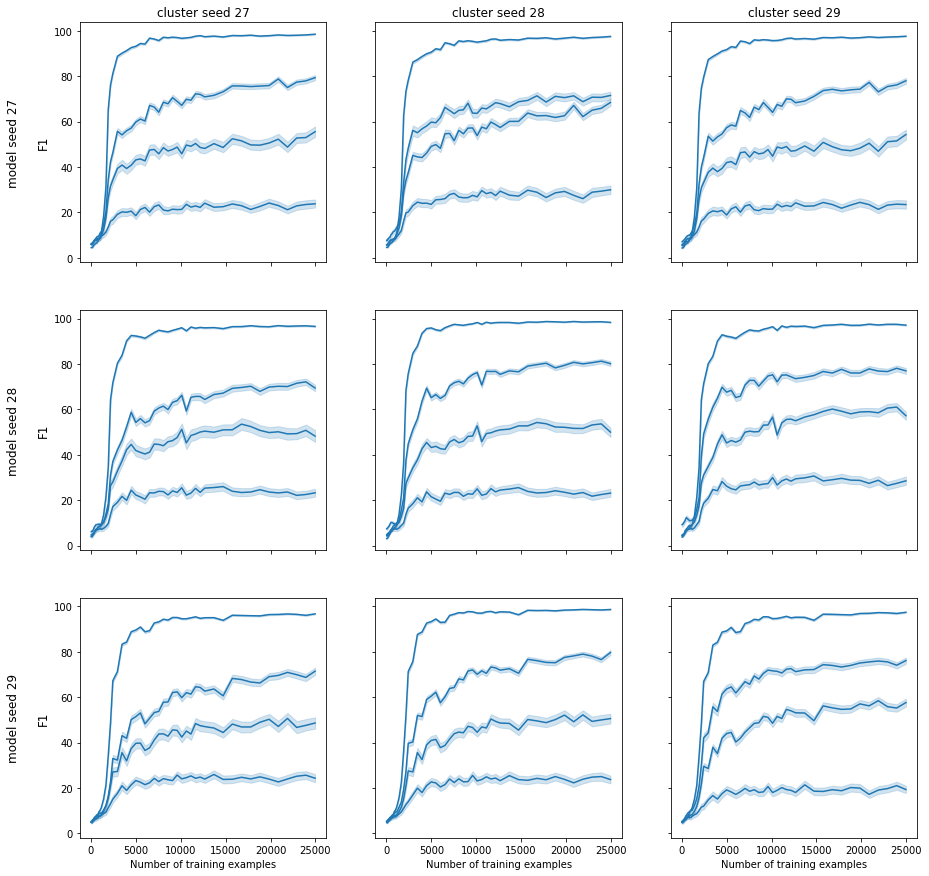

27 27 0 0
27 28 0 1
27 29 0 2
28 27 1 0
28 28 1 1
28 29 1 2
29 27 2 0
29 28 2 1
29 29 2 2


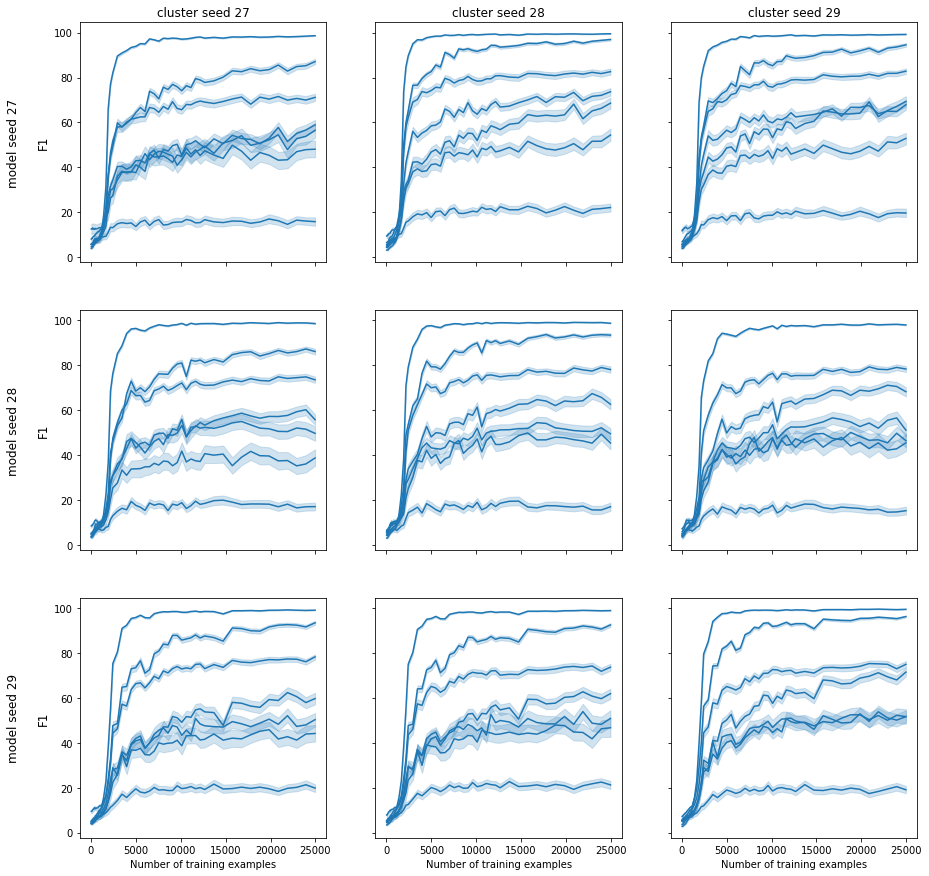

27 27 0 0
27 28 0 1
27 29 0 2
28 27 1 0
28 28 1 1
28 29 1 2
29 27 2 0
29 28 2 1
29 29 2 2


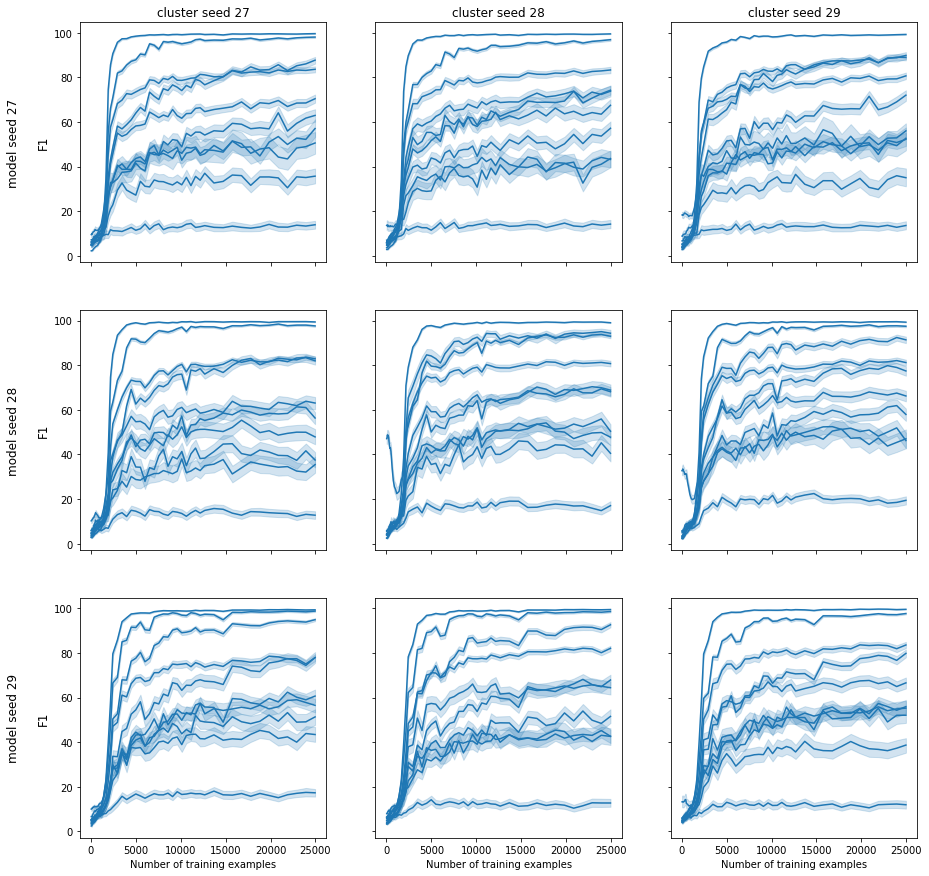

In [15]:
for n_clusters in [4, 7, 10]:

    plot_df = combined[combined['n_clusters'] == n_clusters]

    fig, axs = plt.subplots(len(SEEDS), len(SEEDS), figsize=(15, 15), sharex=True, sharey=True)

    idx_x, idx_y = 0, 0  
    i = 0
    for seed in SEEDS:
        for km_seed in SEEDS:

            print(seed, km_seed, idx_x, idx_y)
            
            plot_df_mean = plot_df[
                (plot_df['model_seed'] == seed) & 
                (plot_df['km_seed'] == km_seed) &
                (plot_df['num_examples'] < 25000)
            ]  # .groupby(
#                 ['num_examples', 'KM_label']  # Take average over examples belonging to a cluster for a given checkpoint
#             ).mean().reset_index()
            
#             assert plot_df_mean.shape[0] == 120 * n_clusters
            
            palette = {c: 'tab:blue' for c in plot_df_mean['KM_label'].unique()}  # Use single color as cluster numbers have no association between plots
            
            sns.lineplot(
                data=plot_df_mean, 
                x='num_examples', 
                y='f1', 
                hue='KM_label',
                ax=axs[idx_x, idx_y],
                palette=palette
            )
            
            axs[idx_x, idx_y].set_xlabel('Number of training examples')

            axs[idx_x, idx_y].get_legend().remove()

            if (i % 3 == 0) | (i % 3 == 1):
                idx_y += 1
            else:
                idx_y -= 2
                idx_x += 1

            i += 1

    rows = [f'model seed {i}\n\nF1' for i in SEEDS]
    cols = [f'cluster seed {i}' for i in SEEDS]

    for ax, col in zip(axs[0], cols):
        ax.set_title(col)

    for ax, row in zip(axs[:,0], rows):
        ax.set_ylabel(row, rotation=90, size='large')
    
    plt.savefig(f'reports/figures/kmeans-cluster-stability-n_clusters={n_clusters}-25k.pdf')
    
    plt.show()

## Cluster analysis

### 4 clusters, model seed 27, cluster seed 27

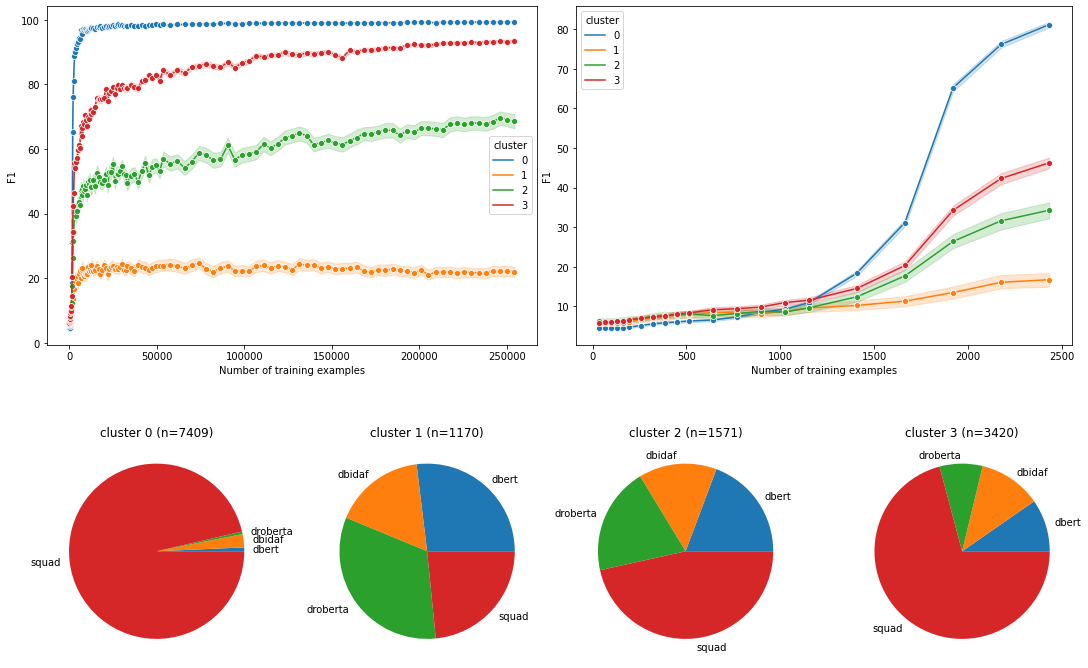

In [14]:
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = fig.add_gridspec(2, 4)
f_ax1 = fig.add_subplot(gs[0, :2])  # Full trajectory
f_ax2 = fig.add_subplot(gs[0, 2:])  # <2.5k
f_ax3 = fig.add_subplot(gs[1, 0])  # Pie chart 1
f_ax4 = fig.add_subplot(gs[1, 1])  # Pie chart 2
f_ax5 = fig.add_subplot(gs[1, 2])  # Pie chart 3
f_ax6 = fig.add_subplot(gs[1, 3])  # Pie chart 4

plot_df = combined.copy()[
    (combined['n_clusters'] == 4) & 
    (combined['seed'] == 27) & 
    (combined['km_seed'] == 27)
]

# Full trajectory
sns.lineplot(
    data=plot_df, 
    x='num_examples', 
    y='f1', 
    hue='KM_label',
    palette='tab10',
    marker='o',
    ax=f_ax1
)
f_ax1.set_ylabel('F1')
f_ax1.set_xlabel('Number of training examples')
f_ax1.legend(title='cluster')

# <2.5k
sns.lineplot(
    data=plot_df[plot_df['num_examples']< 2500], 
    x='num_examples', 
    y='f1', 
    hue='KM_label',
    palette='tab10',
    marker='o',
    ax=f_ax2
)
f_ax2.set_ylabel('F1')
f_ax2.set_xlabel('Number of training examples')
f_ax2.legend(title='cluster')

# Pie charts

subset = plot_df.copy()[['id', 'dataset', 'KM_label']].drop_duplicates()  # Duplicated due to multiple checkpoints

f_ax3.pie(
    x=subset[subset['KM_label'] == 0].groupby('dataset')['id'].count().reset_index()['id'],
    labels=subset[subset['KM_label'] == 0].groupby('dataset')['id'].count().reset_index()['dataset']
)
n = subset[subset['KM_label'] == 0].shape[0]
f_ax3.set_title(f'cluster 0 (n={n})')

f_ax4.pie(
    x=subset[subset['KM_label'] == 1].groupby('dataset')['id'].count().reset_index()['id'],
    labels=subset[subset['KM_label'] == 1].groupby('dataset')['id'].count().reset_index()['dataset']
)
n = subset[subset['KM_label'] == 1].shape[0]
f_ax4.set_title(f'cluster 1 (n={n})')

f_ax5.pie(
    x=subset[subset['KM_label'] == 2].groupby('dataset')['id'].count().reset_index()['id'],
    labels=subset[subset['KM_label'] == 2].groupby('dataset')['id'].count().reset_index()['dataset']
)
n = subset[subset['KM_label'] == 2].shape[0]
f_ax5.set_title(f'cluster 2 (n={n})')

f_ax6.pie(
    x=subset[subset['KM_label'] == 3].groupby('dataset')['id'].count().reset_index()['id'],
    labels=subset[subset['KM_label'] == 3].groupby('dataset')['id'].count().reset_index()['dataset']
)
n = subset[subset['KM_label'] == 3].shape[0]
f_ax6.set_title(f'cluster 3 (n={n})')

plt.savefig(f'reports/figures/kmeans-cluster-analysis-n_clusters=4.pdf')
plt.show()

### 7 clusters, model seed 27, cluster seed 27

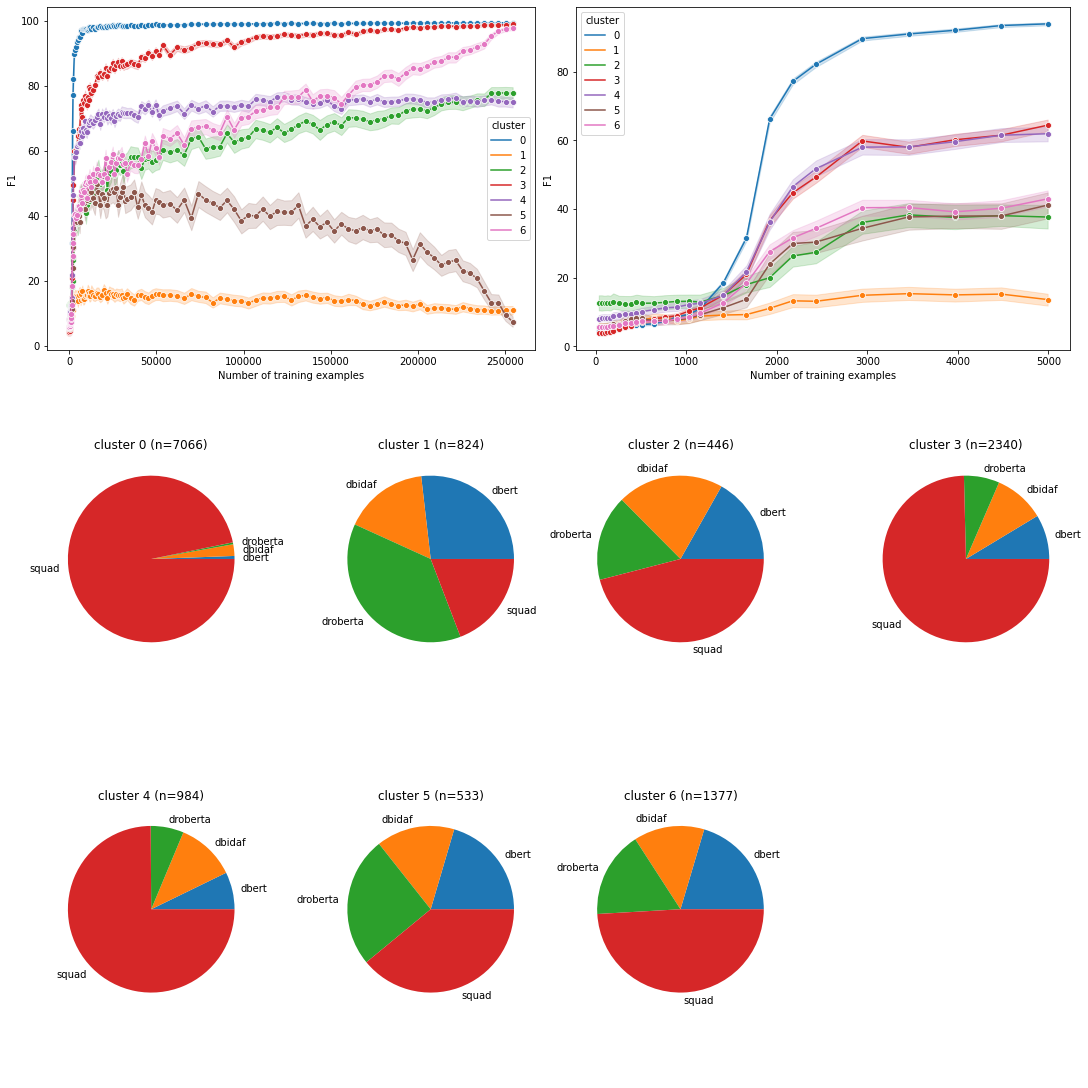

In [15]:
fig = plt.figure(constrained_layout=True, figsize=(15, 15))
gs = fig.add_gridspec(3, 4)
f_ax1 = fig.add_subplot(gs[0, :2])  # Full trajectory
f_ax2 = fig.add_subplot(gs[0, 2:])  # <2.5k
f_ax3 = fig.add_subplot(gs[1, 0])  # Pie chart 1
f_ax4 = fig.add_subplot(gs[1, 1])  # Pie chart 2
f_ax5 = fig.add_subplot(gs[1, 2])  # Pie chart 3
f_ax6 = fig.add_subplot(gs[1, 3])  # Pie chart 4
f_ax7 = fig.add_subplot(gs[2, 0])  # Pie chart 5
f_ax8 = fig.add_subplot(gs[2, 1])  # Pie chart 6
f_ax9 = fig.add_subplot(gs[2, 2])  # Pie chart 7
f_ax10 = fig.add_subplot(gs[2, 3])  # Pie chart 8 (Blank)

plot_df = combined.copy()[
    (combined['n_clusters'] == 7) & 
    (combined['seed'] == 27) & 
    (combined['km_seed'] == 27)
]

# Full trajectory
sns.lineplot(
    data=plot_df, 
    x='num_examples', 
    y='f1', 
    hue='KM_label',
    palette='tab10',
    marker='o',
    ax=f_ax1
)
f_ax1.set_ylabel('F1')
f_ax1.set_xlabel('Number of training examples')
f_ax1.legend(title='cluster')

# <5k
sns.lineplot(
    data=plot_df[plot_df['num_examples']< 5000], 
    x='num_examples', 
    y='f1', 
    hue='KM_label',
    palette='tab10',
    marker='o',
    ax=f_ax2
)
f_ax2.set_ylabel('F1')
f_ax2.set_xlabel('Number of training examples')
f_ax2.legend(title='cluster')

# Pie charts

subset = plot_df.copy()[['id', 'dataset', 'KM_label']].drop_duplicates()  # Duplicated due to multiple checkpoints

f_ax3.pie(
    x=subset[subset['KM_label'] == 0].groupby('dataset')['id'].count().reset_index()['id'],
    labels=subset[subset['KM_label'] == 0].groupby('dataset')['id'].count().reset_index()['dataset']
)
n = subset[subset['KM_label'] == 0].shape[0]
f_ax3.set_title(f'cluster 0 (n={n})')

f_ax4.pie(
    x=subset[subset['KM_label'] == 1].groupby('dataset')['id'].count().reset_index()['id'],
    labels=subset[subset['KM_label'] == 1].groupby('dataset')['id'].count().reset_index()['dataset']
)
n = subset[subset['KM_label'] == 1].shape[0]
f_ax4.set_title(f'cluster 1 (n={n})')

f_ax5.pie(
    x=subset[subset['KM_label'] == 2].groupby('dataset')['id'].count().reset_index()['id'],
    labels=subset[subset['KM_label'] == 2].groupby('dataset')['id'].count().reset_index()['dataset']
)
n = subset[subset['KM_label'] == 2].shape[0]
f_ax5.set_title(f'cluster 2 (n={n})')

f_ax6.pie(
    x=subset[subset['KM_label'] == 3].groupby('dataset')['id'].count().reset_index()['id'],
    labels=subset[subset['KM_label'] == 3].groupby('dataset')['id'].count().reset_index()['dataset']
)
n = subset[subset['KM_label'] == 3].shape[0]
f_ax6.set_title(f'cluster 3 (n={n})')

f_ax7.pie(
    x=subset[subset['KM_label'] == 4].groupby('dataset')['id'].count().reset_index()['id'],
    labels=subset[subset['KM_label'] == 4].groupby('dataset')['id'].count().reset_index()['dataset']
)
n = subset[subset['KM_label'] == 4].shape[0]
f_ax7.set_title(f'cluster 4 (n={n})')

f_ax8.pie(
    x=subset[subset['KM_label'] == 5].groupby('dataset')['id'].count().reset_index()['id'],
    labels=subset[subset['KM_label'] == 5].groupby('dataset')['id'].count().reset_index()['dataset']
)
n = subset[subset['KM_label'] == 5].shape[0]
f_ax8.set_title(f'cluster 5 (n={n})')

f_ax9.pie(
    x=subset[subset['KM_label'] == 6].groupby('dataset')['id'].count().reset_index()['id'],
    labels=subset[subset['KM_label'] == 6].groupby('dataset')['id'].count().reset_index()['dataset']
)
n = subset[subset['KM_label'] == 6].shape[0]
f_ax9.set_title(f'cluster 6 (n={n})')

# blank
f_ax10.axis('off')

plt.savefig(f'reports/figures/kmeans-cluster-analysis-n_clusters=7.pdf')
plt.show()

### 10 clusters, model seed 27, cluster seed 28

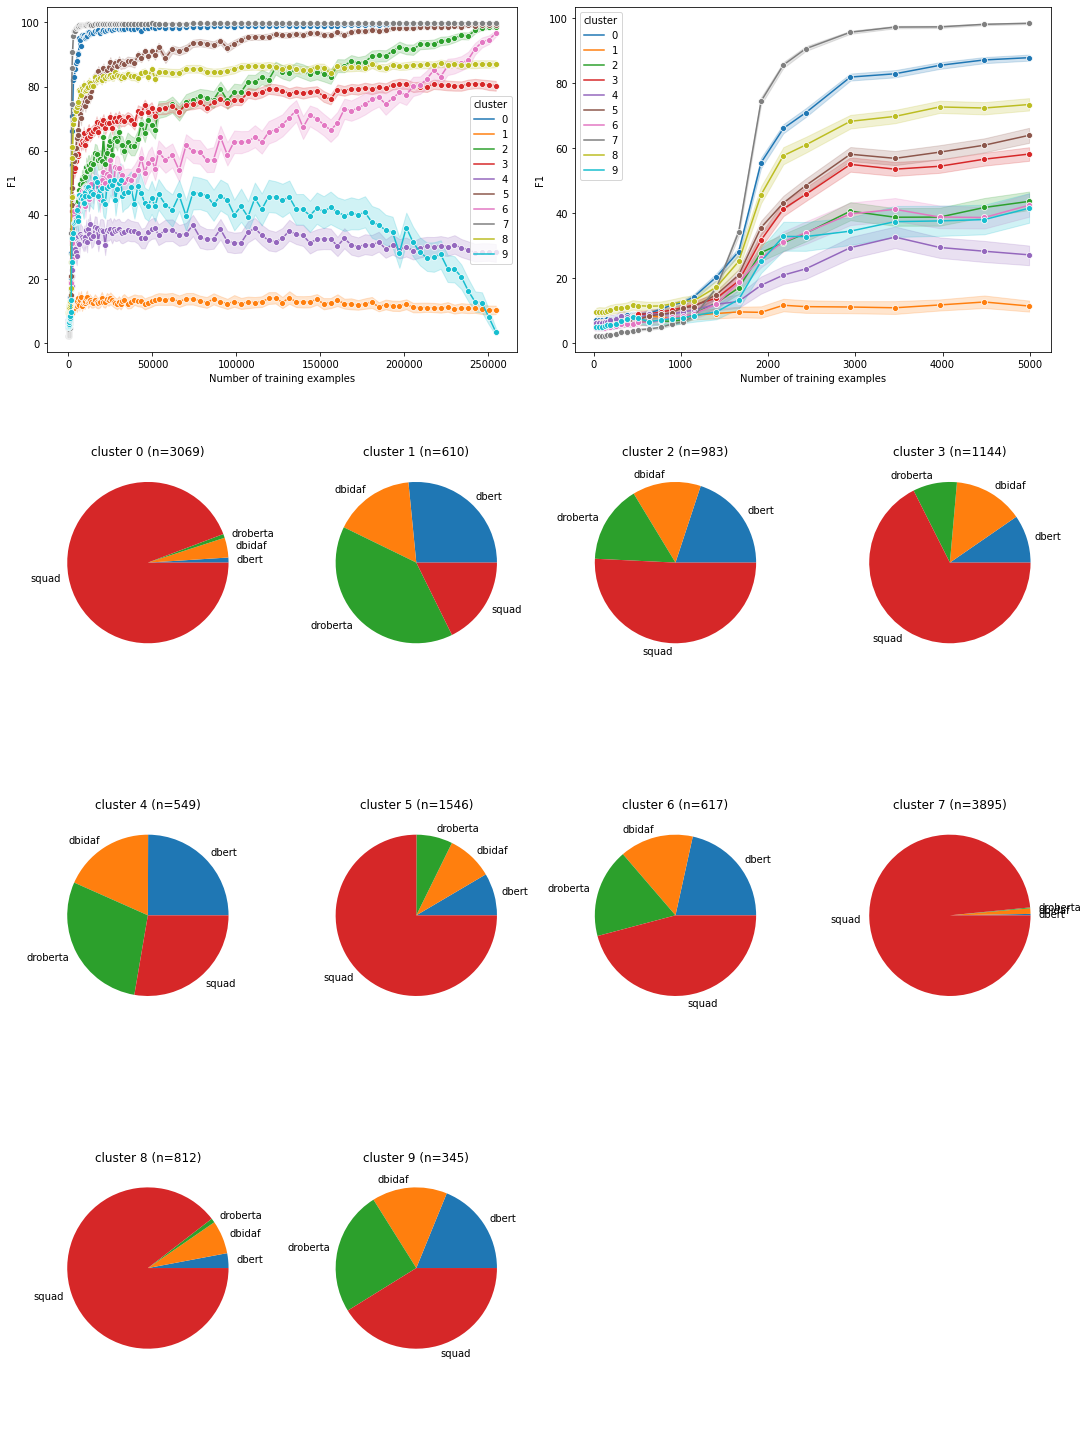

In [16]:
fig = plt.figure(constrained_layout=True, figsize=(15, 20))
gs = fig.add_gridspec(4, 4)
f_ax1 = fig.add_subplot(gs[0, :2])  # Full trajectory
f_ax2 = fig.add_subplot(gs[0, 2:])  # <2.5k
f_ax3 = fig.add_subplot(gs[1, 0])  # Pie chart 1
f_ax4 = fig.add_subplot(gs[1, 1])  # Pie chart 2
f_ax5 = fig.add_subplot(gs[1, 2])  # Pie chart 3
f_ax6 = fig.add_subplot(gs[1, 3])  # Pie chart 4
f_ax7 = fig.add_subplot(gs[2, 0])  # Pie chart 5
f_ax8 = fig.add_subplot(gs[2, 1])  # Pie chart 6
f_ax9 = fig.add_subplot(gs[2, 2])  # Pie chart 7
f_ax10 = fig.add_subplot(gs[2, 3])  # Pie chart 8
f_ax11 = fig.add_subplot(gs[3, 0])  # Pie chart 9
f_ax12 = fig.add_subplot(gs[3, 1])  # Pie chart 10
f_ax13 = fig.add_subplot(gs[3, 2])  # Pie chart 11 (blank)
f_ax14 = fig.add_subplot(gs[3, 3])  # Pie chart 12 (blank)

plot_df = combined.copy()[
    (combined['n_clusters'] == 10) & 
    (combined['seed'] == 27) & 
    (combined['km_seed'] == 27)
]

# Full trajectory
sns.lineplot(
    data=plot_df, 
    x='num_examples', 
    y='f1', 
    hue='KM_label',
    palette='tab10',
    marker='o',
    ax=f_ax1
)
f_ax1.set_ylabel('F1')
f_ax1.set_xlabel('Number of training examples')
f_ax1.legend(title='cluster')

# <5k
sns.lineplot(
    data=plot_df[plot_df['num_examples']< 5000], 
    x='num_examples', 
    y='f1', 
    hue='KM_label',
    palette='tab10',
    marker='o',
    ax=f_ax2
)
f_ax2.set_ylabel('F1')
f_ax2.set_xlabel('Number of training examples')
f_ax2.legend(title='cluster')

# Pie charts

subset = plot_df.copy()[['id', 'dataset', 'KM_label']].drop_duplicates()  # Duplicated due to multiple checkpoints

f_ax3.pie(
    x=subset[subset['KM_label'] == 0].groupby('dataset')['id'].count().reset_index()['id'],
    labels=subset[subset['KM_label'] == 0].groupby('dataset')['id'].count().reset_index()['dataset']
)
n = subset[subset['KM_label'] == 0].shape[0]
f_ax3.set_title(f'cluster 0 (n={n})')

f_ax4.pie(
    x=subset[subset['KM_label'] == 1].groupby('dataset')['id'].count().reset_index()['id'],
    labels=subset[subset['KM_label'] == 1].groupby('dataset')['id'].count().reset_index()['dataset']
)
n = subset[subset['KM_label'] == 1].shape[0]
f_ax4.set_title(f'cluster 1 (n={n})')

f_ax5.pie(
    x=subset[subset['KM_label'] == 2].groupby('dataset')['id'].count().reset_index()['id'],
    labels=subset[subset['KM_label'] == 2].groupby('dataset')['id'].count().reset_index()['dataset']
)
n = subset[subset['KM_label'] == 2].shape[0]
f_ax5.set_title(f'cluster 2 (n={n})')

f_ax6.pie(
    x=subset[subset['KM_label'] == 3].groupby('dataset')['id'].count().reset_index()['id'],
    labels=subset[subset['KM_label'] == 3].groupby('dataset')['id'].count().reset_index()['dataset']
)
n = subset[subset['KM_label'] == 3].shape[0]
f_ax6.set_title(f'cluster 3 (n={n})')

f_ax7.pie(
    x=subset[subset['KM_label'] == 4].groupby('dataset')['id'].count().reset_index()['id'],
    labels=subset[subset['KM_label'] == 4].groupby('dataset')['id'].count().reset_index()['dataset']
)
n = subset[subset['KM_label'] == 4].shape[0]
f_ax7.set_title(f'cluster 4 (n={n})')

f_ax8.pie(
    x=subset[subset['KM_label'] == 5].groupby('dataset')['id'].count().reset_index()['id'],
    labels=subset[subset['KM_label'] == 5].groupby('dataset')['id'].count().reset_index()['dataset']
)
n = subset[subset['KM_label'] == 5].shape[0]
f_ax8.set_title(f'cluster 5 (n={n})')

f_ax9.pie(
    x=subset[subset['KM_label'] == 6].groupby('dataset')['id'].count().reset_index()['id'],
    labels=subset[subset['KM_label'] == 6].groupby('dataset')['id'].count().reset_index()['dataset']
)
n = subset[subset['KM_label'] == 6].shape[0]
f_ax9.set_title(f'cluster 6 (n={n})')

f_ax10.pie(
    x=subset[subset['KM_label'] == 7].groupby('dataset')['id'].count().reset_index()['id'],
    labels=subset[subset['KM_label'] == 7].groupby('dataset')['id'].count().reset_index()['dataset']
)
n = subset[subset['KM_label'] == 7].shape[0]
f_ax10.set_title(f'cluster 7 (n={n})')

f_ax11.pie(
    x=subset[subset['KM_label'] == 8].groupby('dataset')['id'].count().reset_index()['id'],
    labels=subset[subset['KM_label'] == 8].groupby('dataset')['id'].count().reset_index()['dataset']
)
n = subset[subset['KM_label'] == 8].shape[0]
f_ax11.set_title(f'cluster 8 (n={n})')

f_ax12.pie(
    x=subset[subset['KM_label'] == 9].groupby('dataset')['id'].count().reset_index()['id'],
    labels=subset[subset['KM_label'] == 9].groupby('dataset')['id'].count().reset_index()['dataset']
)
n = subset[subset['KM_label'] == 9].shape[0]
f_ax12.set_title(f'cluster 9 (n={n})')

# blank
f_ax13.axis('off')
f_ax14.axis('off')

plt.savefig(f'reports/figures/kmeans-cluster-analysis-n_clusters=10.pdf')
plt.show()